In [63]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import statsmodels.api as sm

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [52]:
from pmdarima import auto_arima

In [53]:
df1=pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col="Date",parse_dates=True)

In [54]:
df1.index.freq='D'

In [55]:
df1=df1[:120]

In [127]:
df2=pd.read_csv('Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

# ARMA

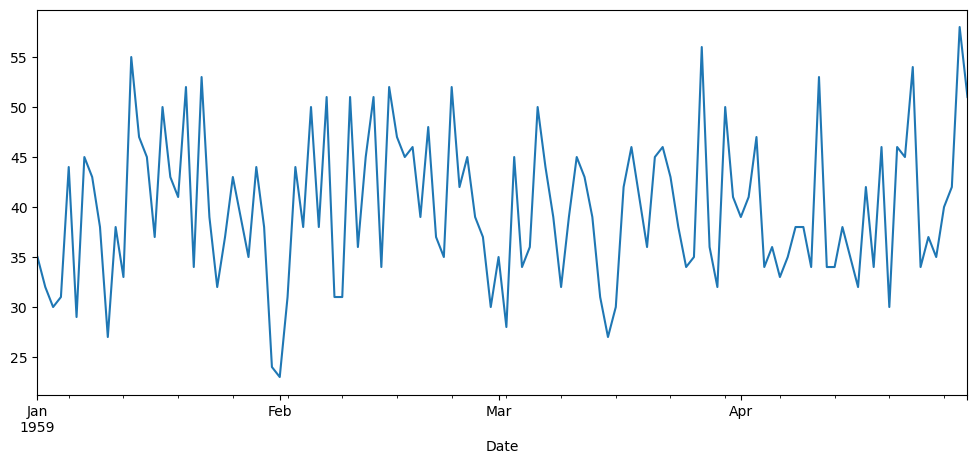

In [57]:
df1['Births'].plot(figsize=(12,5));

In [58]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    
    
    print(f'Augmented Dickey-Fuller Test:{title}')
    result=adfuller(series.dropna(),autolag='AIC')
    
    labels=['ADF Test Stats','P-Value','# Lags Used','# Observations']
    out=pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
        
    print(out.to_string())     #to remove the line dtype: float64
    
    
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and its stationary")
        
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to Reject the null hypothesis")
        print("Data has a unit root and its non-stationary")
        

In [59]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test:
ADF Test Stats         -9.855384e+00
P-Value                 4.373545e-17
# Lags Used             0.000000e+00
# Observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and its stationary


In [60]:
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Thu, 21 Sep 2023   AIC                            823.489
Time:                        11:06:47   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
stepwise_fit= auto_arima(df1['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.438 seconds


In [33]:
train=df1.iloc[:90]
test=df1.iloc[90:]

In [115]:
model=ARIMA(train['Births'],order=(0,0,0)).fit()

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                          ARIMA   Log Likelihood                -308.379
Date:                Thu, 21 Sep 2023   AIC                            620.759
Time:                        12:02:09   BIC                            625.759
Sample:                    01-01-1959   HQIC                           622.775
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7667      0.786     50.609      0.000      38.227      41.307
sigma2        55.4236     10.155      5.458      0.000      35.520      75.327
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.41   Prob(JB):                         0.42
Heteroskedasticity (H):               0.90   Skew:                             0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
start=len(train)
end=len(train)+len(test) -1

In [121]:
predictions=model.predict(start,end).rename('ARMA (0,0,0) Predictions')

In [122]:
predictions

1959-04-01    39.766662
1959-04-02    39.766662
1959-04-03    39.766662
1959-04-04    39.766662
1959-04-05    39.766662
1959-04-06    39.766662
1959-04-07    39.766662
1959-04-08    39.766662
1959-04-09    39.766662
1959-04-10    39.766662
1959-04-11    39.766662
1959-04-12    39.766662
1959-04-13    39.766662
1959-04-14    39.766662
1959-04-15    39.766662
1959-04-16    39.766662
1959-04-17    39.766662
1959-04-18    39.766662
1959-04-19    39.766662
1959-04-20    39.766662
1959-04-21    39.766662
1959-04-22    39.766662
1959-04-23    39.766662
1959-04-24    39.766662
1959-04-25    39.766662
1959-04-26    39.766662
1959-04-27    39.766662
1959-04-28    39.766662
1959-04-29    39.766662
1959-04-30    39.766662
Freq: D, Name: ARMA (0,0,0) Predictions, dtype: float64

<Axes: xlabel='Date'>

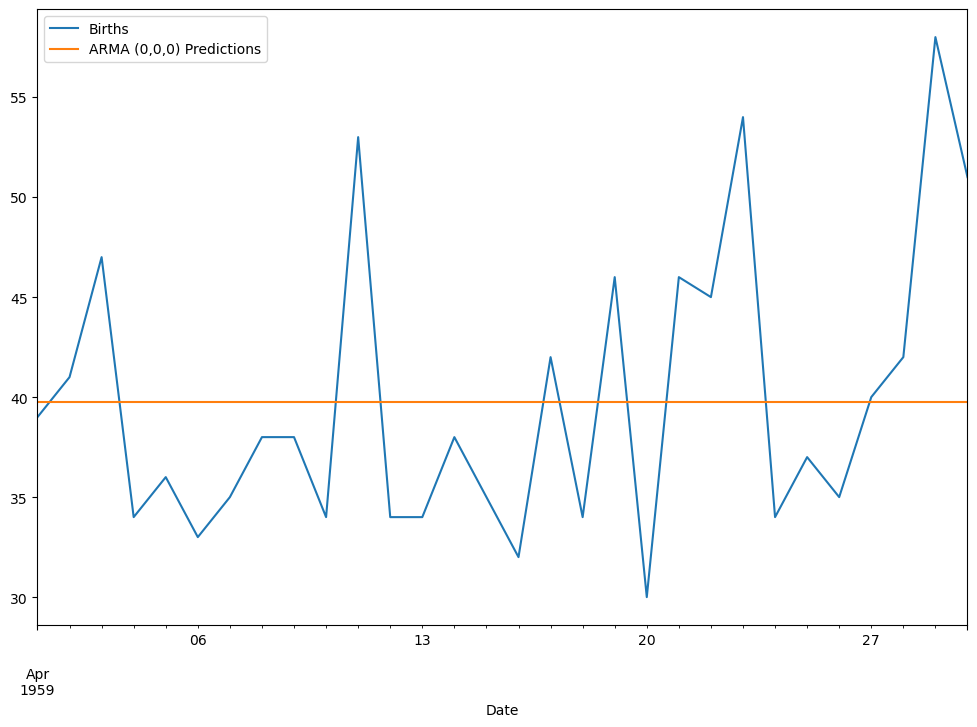

In [123]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [124]:
test.mean()

Births    39.833333
dtype: float64

In [125]:
predictions.mean()

39.76666165405539

<Axes: xlabel='Date'>

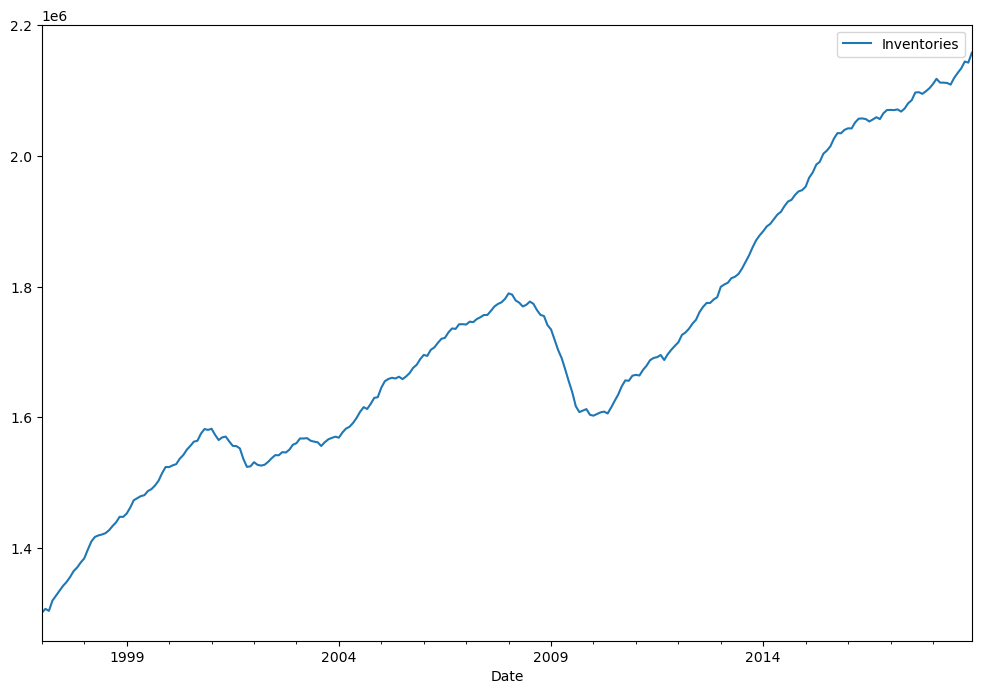

In [128]:
df2.plot(figsize=(12,8))

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose

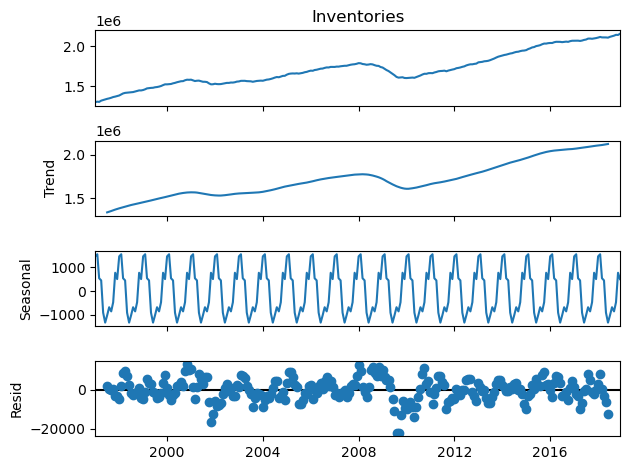

In [130]:
result=seasonal_decompose(df2['Inventories'],model='add')
result.plot();

In [131]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 21 Sep 2023   AIC                           5348.037
Time:                        12:03:15   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.221 seconds


In [142]:
Trade_stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 21 Sep 2023   AIC                           5348.037
Time:                        12:07:31   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
from statsmodels.tsa.statespace.tools import diff

In [144]:
df2['diff_1']=diff(df2['Inventories'],k_diff=1)

In [145]:
adf_test(df2['diff_1'])

Augmented Dickey-Fuller Test:
ADF Test Stats           -3.412249
P-Value                   0.010548
# Lags Used               4.000000
# Observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and its stationary


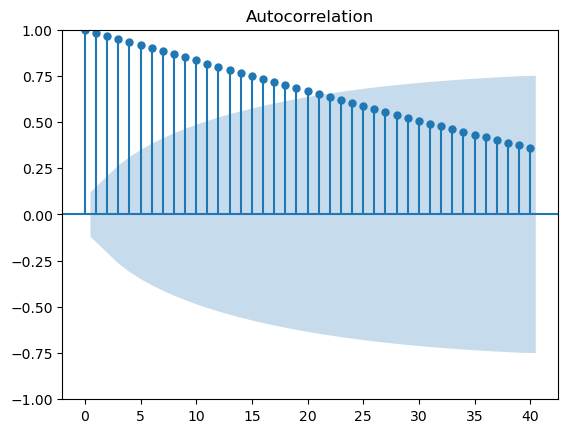

In [146]:
plot_acf(df2['Inventories'],lags=40);

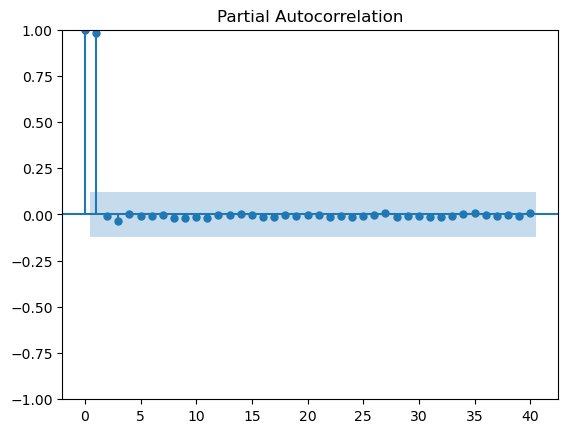

In [147]:
plot_pacf(df2['Inventories'],lags=40);

In [150]:
#AR=1
#I=1
#MA=0 or 1

In [148]:
Trade_stepwise_fit=auto_arima(df2["Inventories"],start_p=0,start_q=0,max_q=2,max_p=2,seasonal=False,trace=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.212 seconds


In [149]:
Trade_stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 21 Sep 2023   AIC                           5348.037
Time:                        12:37:02   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
len(df2)

264

In [152]:
train =df2.iloc[:252]
test=df2.iloc[252:]

In [171]:
result=ARIMA(train['Inventories'],order=(0,1,0)).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2579.217
Date:                Thu, 21 Sep 2023   AIC                           5160.434
Time:                        12:56:44   BIC                           5163.959
Sample:                    01-01-1997   HQIC                          5161.852
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.911e+07   4.75e+06     10.330      0.000    3.98e+07    5.84e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               105.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -1.20
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
result1=ARIMA(train['Inventories'],order=(1,1,1)).fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2556.962
Date:                Thu, 21 Sep 2023   AIC                           5119.924
Time:                        12:55:15   BIC                           5130.500
Sample:                    01-01-1997   HQIC                          5124.180
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    876.455      0.000       0.998       1.002
ma.L1         -0.9999      0.034    -29.481      0.000      -1.066      -0.933
sigma2      3.107e+07   3.14e-10   9.89e+16      0.000    3.11e+07    3.11e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               101.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -1.18
Prob(H) (two-sided):                  0.46   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.28e+33. Standard errors may be unstable.
"""

In [172]:
start= len(train)
end= len(train) + len(test) -1

predictions = result.predict(start=start,end=end,type='levels').rename('ARIMA (0,1,0) predictions')

In [173]:
predictions1 = result1.predict(start=start,end=end,type='levels').rename('ARIMA (1,1,1) predictions')

<Axes: xlabel='Date'>

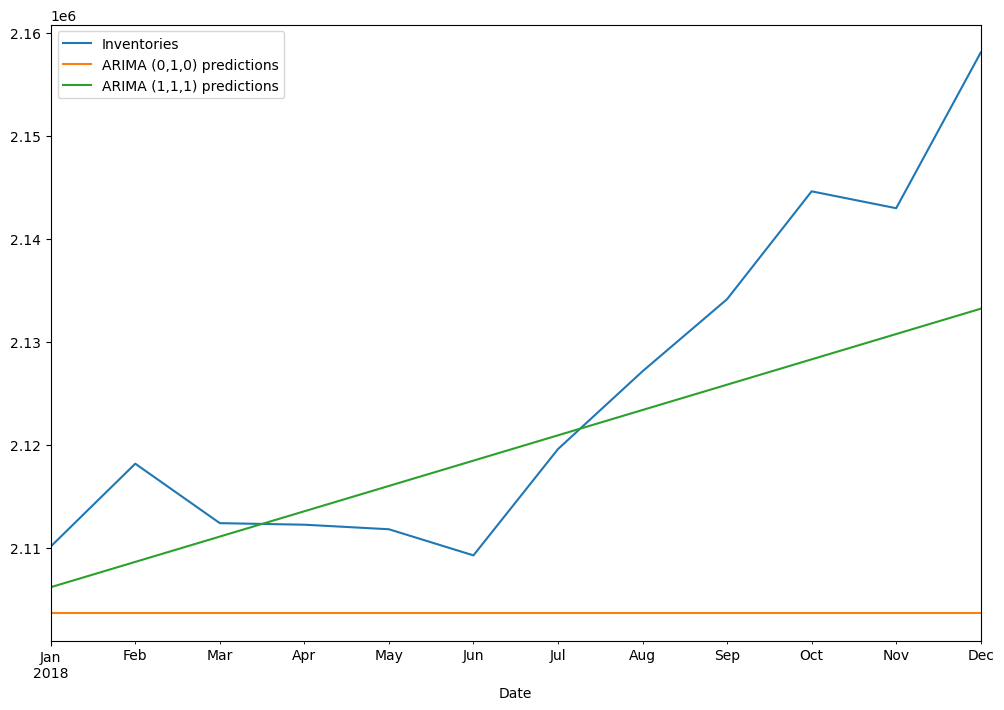

In [174]:
test['Inventories'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)
predictions1.plot(legend=True)

In [175]:
from statsmodels.tools.eval_measures import rmse

In [176]:
error=rmse(test['Inventories'],predictions)
error

26437.5793931038

In [177]:
error1=rmse(test['Inventories'],predictions1)
error1

10531.060968700249

# Forcasting

In [179]:
model1= ARIMA(df2['Inventories'],order=(1,1,1)).fit()
model2=ARIMA(df2['Inventories'],order=(0,1,0)).fit()

In [180]:
fcast1= model1.predict(start=len(df2),end=len(df2)+12,type='levels').rename('ARIMA (1,1,1) predictions')
fcast2= model2.predict(start=len(df2),end=len(df2)+12,type='levels').rename('ARIMA (0,1,0) predictions')

<Axes: xlabel='Date'>

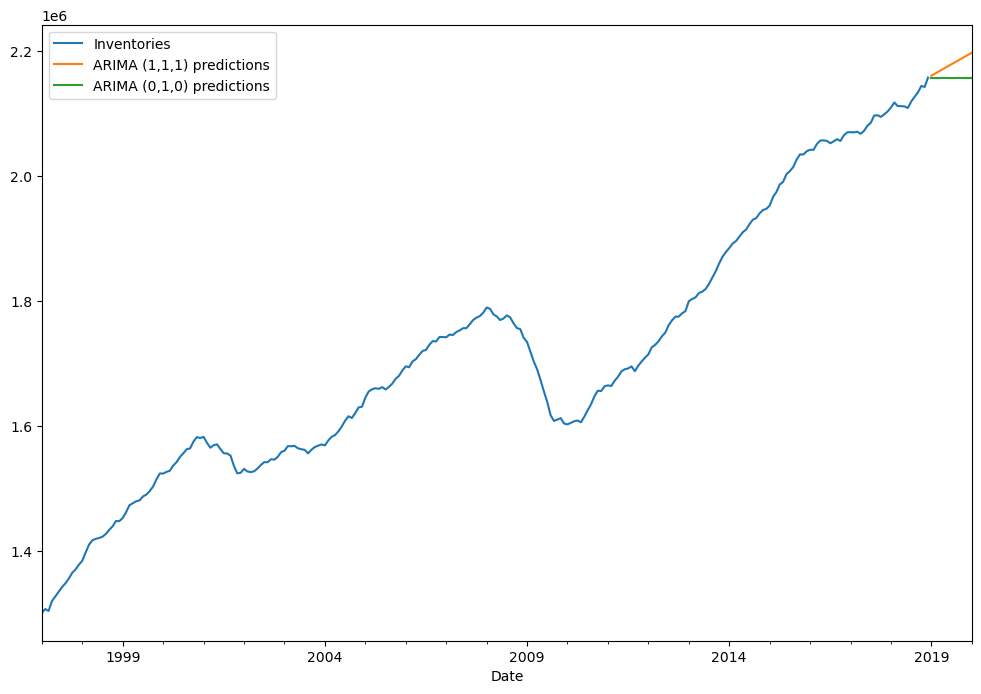

In [182]:
df2['Inventories'].plot(legend=True,figsize=(12,8));
fcast1.plot(legend=True)
fcast2.plot(legend=True)